In [79]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import random

In [80]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
input_shape=(28,28,1)

In [81]:
# x_train=x_train.reshape(x_train.shape[0],28,28,1)
# x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [82]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [83]:
x_train=x_train/255
x_test=x_test/255
print("Shape of Training:",x_train.shape)
print("Shape of testing:",x_test.shape)

Shape of Training: (60000, 28, 28)
Shape of testing: (10000, 28, 28)


In [84]:
model=Sequential()
model.add(Conv2D(28, kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(28, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 28)          │           7,084 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 28)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 700)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 200)                 │         140,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,574 (584.27 KB)

 Trainable params: 149,574 (584.27 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.8888 - loss: 0.3614
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9791 - loss: 0.0660
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9852 - loss: 0.0450
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9892 - loss: 0.0330
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9907 - loss: 0.0286
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9919 - loss: 0.0238
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9939 - loss: 0.0193
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9947 - loss: 0.0157
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9951 - loss: 0.0141
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9957 - loss: 0.0131


In [86]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss:%.3f" %test_loss)
print("Accuracy:%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9891 - loss: 0.0399
Loss:0.033
Accuracy:0.991


In [87]:
# image=x_train[7]
# plt.imshow(np.squeeze(image),cmap='gray') #single dimension ke entries ko remove karta hai
# plt.show()

In [88]:
# image = image.reshape(1,28,28,1)

# # Make the prediction
# predict_model = model.predict(image)

# # Correct print statement with np.argmax
# print("Predicted Class:", np.argmax(predict_model)) #maxium probability kontya class che ahe 

<function matplotlib.pyplot.show(close=None, block=None)>

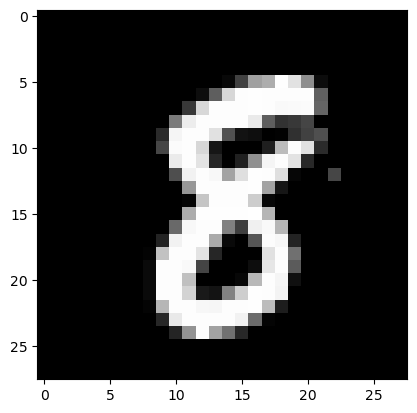

In [89]:
n=random.randint(0,9999)
plt.imshow(x_test[n], cmap = 'gray')
plt.show
# predicted_val=model.predict(x_test)
# print("Predicted Value:",np.argmax(predicted_val[n]))

In [90]:
predicted_val=model.predict(x_test)
print("Predicted Value:",np.argmax(predicted_val[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Predicted Value: 8
